# # Kidney Disease

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Importing done

In [2]:
df=pd.read_csv(r"C:\Users\Divyanshu Dubey\Desktop\kidney_disease.csv")

Data Loading Done

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


checking The Structure of dataframne

In [4]:
df.shape

(400, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [7]:
df.isnull().sum()/df.shape[0]*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

checking the Percentage of the missing values

<Axes: >

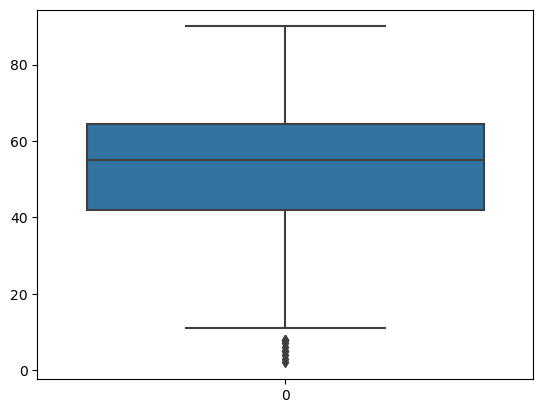

In [8]:
sns.boxplot(df['age'])

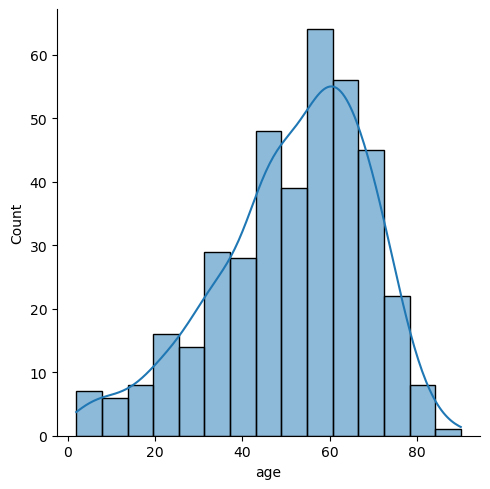

In [9]:
sns.displot(df['age'],kde=True)

In [10]:
df['age'].fillna(int(df['age'].mean()),inplace=True)

<Axes: xlabel='bp', ylabel='Density'>

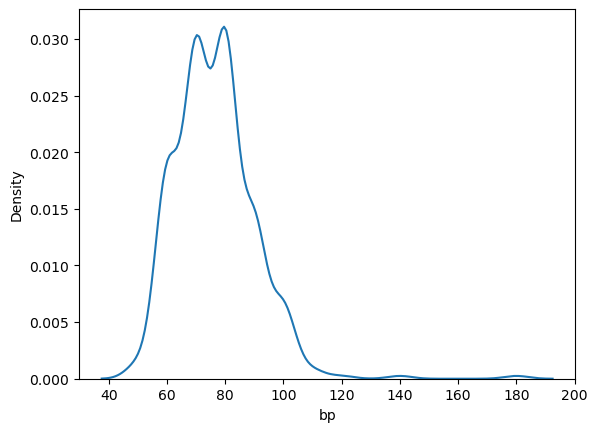

In [11]:
sns.kdeplot(df['bp'])

In [12]:
df['bp'].fillna(df['bp'].median(),inplace=True)

In [13]:
df['pcc'].fillna(df['pcc'].mode()[0],inplace=True)

In [14]:
df['ba'].fillna(df['ba'].mode()[0],inplace=True)

In [15]:
df_cag=df.select_dtypes(include='object')
df_cag.drop(columns=['pcv','wc','rc',],inplace=True)
for col in df_cag.columns:
    df[col] = df[col].str.replace('\t', '')


In [16]:
df_copy=df.copy()
for col in df_cag.columns:
    if (df[col].isnull().sum()/df.shape[0]*100)<=1:
        for var_class in df['classification'].unique():
            df_copy.update(df[df.loc[:,'classification'] == var_class][col].replace(np.nan,df[df.loc[:,'classification'] == var_class][col].mode()[0]))
df=df_copy

WHichever Categorical data has less than 1 % missing value Giving Them The most repeated Values

In [17]:
df['htn'] = df['htn'].map({'yes':1,'no':0})
df['dm'] = df['dm'].map({'yes':1,'no':0})
df['cad'] = df['cad'].map({'yes':1,'no':0})
df['appet'] = df['appet'].map({'good':1,'poor':0})
df['ane'] = df['ane'].map({'yes':1,'no':0})
df['pe'] = df['pe'].map({'yes':1,'no':0})
df['ba'] = df['ba'].map({'present':1,'notpresent':0})
df['pcc'] = df['pcc'].map({'present':1,'notpresent':0})
df['pc'] = df['pc'].map({'abnormal':1,'normal':0})
df['rbc'] = df['rbc'].map({'abnormal':1,'normal':0})
df['classification']=df['classification'].map({'ckd':1,'notckd':0})

MANUALLY ENCODING ALL THE CATEGORICAL DATA

<Axes: xlabel='classification', ylabel='count'>

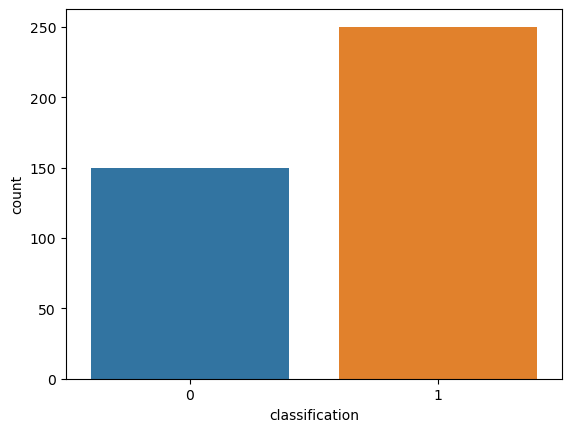

In [18]:
sns.countplot(x='classification',data=df)

C:\Users\Divyanshu Dubey\AppData\Local\Temp\ipykernel_25796\148149038.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


<Axes: >

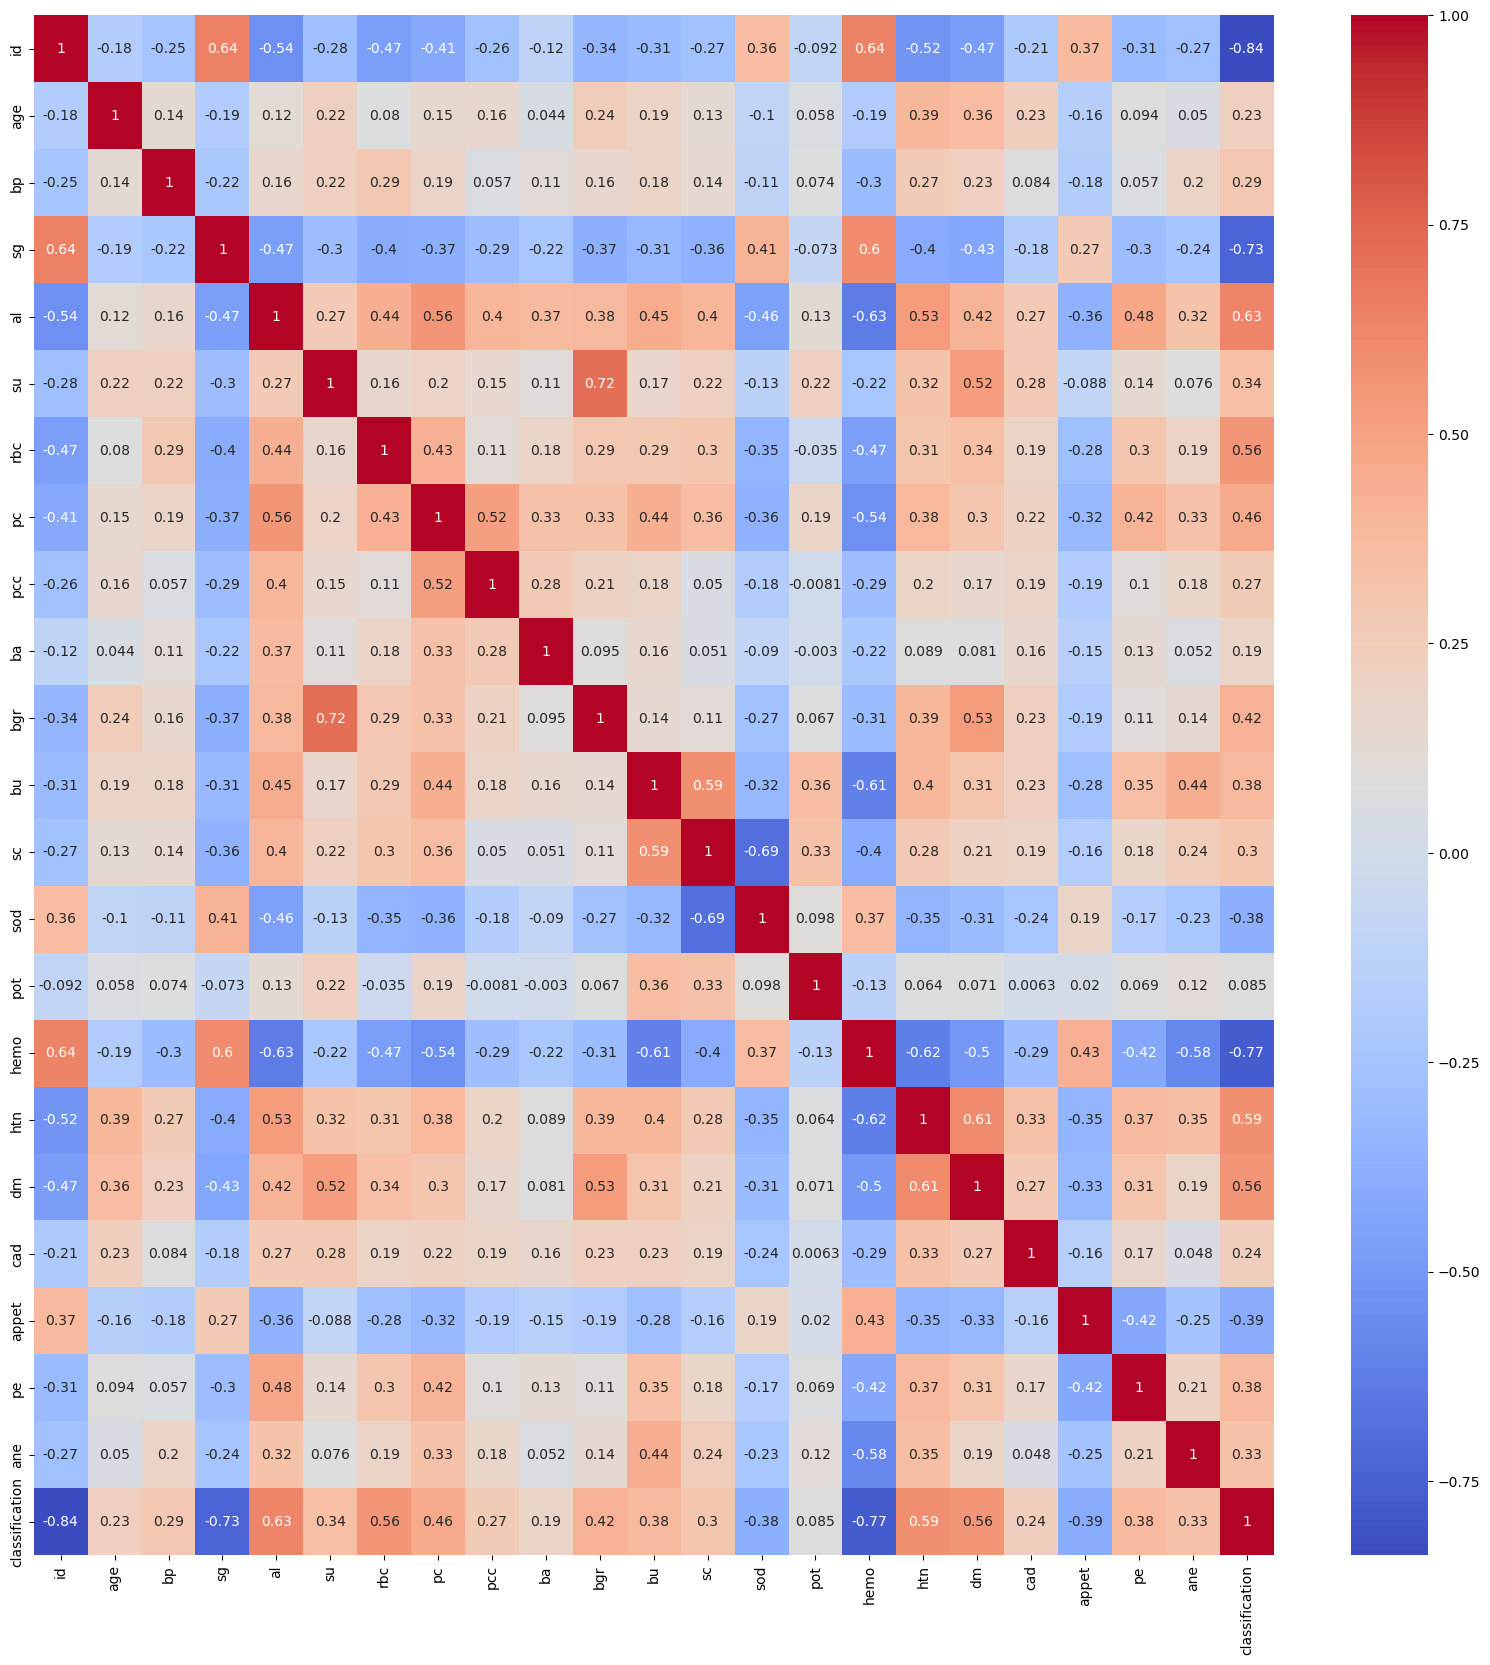

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

NOW FOR REST DATA FILLING WE ARE FINDING SOME CORRELATION BETWEEN VARIABLES 
INFERENCE: RBC IS HIGHLY CORRELATED TO CLASSIFICATION

In [20]:
# Group by classification and rbc and count
df.groupby(['classification', 'rbc'])['classification'].count().unstack()

rbc,0.0,1.0
classification,,
0,141.0,NaN
1,60.0,47.0


In [21]:
df_copy=df.copy()
for var_class in df['classification'].unique():
    df_copy.update(df[df.loc[:,'classification'] == var_class]["rbc"].replace(np.nan,df[df.loc[:,'classification'] == var_class]["rbc"].mode()[0]))
df['rbc']=df_copy['rbc']

GIVING GROUP BY MODE VALUES TO RBC

In [22]:
df_copy=df.copy()
for var_class in df['pcc'].unique():
    df_copy.update(df[df.loc[:,'pcc'] == var_class]["pc"].replace(np.nan,df[df.loc[:,'pcc'] == var_class]["pc"].mode()[0]))
df['pc']=df_copy['pc']

GIVING GROUP BY MODE VALUES TO PC

In [23]:
df = df.replace('\t', '', regex=True)

REMOVING WHEREVER THERE IS \t

In [24]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0,0,121.0,36.0,1.20,NaN,NaN,15.4,44,7800,5.2,1,1.0,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0,0,NaN,18.0,0.80,NaN,NaN,11.3,38,6000,NaN,0,0.0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0,0,423.0,53.0,1.80,NaN,NaN,9.6,31,7500,NaN,0,1.0,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1,0,117.0,56.0,3.80,111.0,2.5,11.2,32,6700,3.9,1,0.0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0,0,106.0,26.0,1.40,NaN,NaN,11.6,35,7300,4.6,0,0.0,0,1,0,0,1
5,5,60.0,90.0,1.015,3.0,0.0,0.0,0.0,0,0,74.0,25.0,1.10,142.0,3.2,12.2,39,7800,4.4,1,1.0,0,1,1,0,1
6,6,68.0,70.0,1.010,0.0,0.0,0.0,0.0,0,0,100.0,54.0,24.00,104.0,4.0,12.4,36,NaN,NaN,0,0.0,0,1,0,0,1
7,7,24.0,80.0,1.015,2.0,4.0,0.0,1.0,0,0,410.0,31.0,1.10,NaN,NaN,12.4,44,6900,5,0,1.0,0,1,1,0,1
8,8,52.0,100.0,1.015,3.0,0.0,0.0,1.0,1,0,138.0,60.0,1.90,NaN,NaN,10.8,33,9600,4.0,1,1.0,0,1,0,1,1
9,9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1,0,70.0,107.0,7.20,114.0,3.7,9.5,29,12100,3.7,1,1.0,0,0,0,1,1


In [25]:
df=df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_mean

SimpleImputer()

In [28]:
imputer_median=SimpleImputer(strategy='median')
imputer_median

SimpleImputer(strategy='median')

In [29]:
apply_mean=['bgr','bu','sod','hemo','wc','rc']
apply_median=['sg','al','su','pcv','pot']

In [30]:
imputer_mean.fit(df[apply_mean])
imputer_median.fit(df[apply_median])

SimpleImputer(strategy='median')

In [31]:
df_copy=df.copy()
for var_class in df['classification'].unique():
    for col in apply_mean:
        df_copy.update(df[df.loc[:,'classification'] == var_class][col].replace(np.nan,df[df.loc[:,'classification'] == var_class][col].mean()))
df[apply_mean]=df_copy[apply_mean]

In [32]:
[i for i in df['sc']]

[1.2,
 0.8,
 1.8,
 3.8,
 1.4,
 1.1,
 24.0,
 1.1,
 1.9,
 7.2,
 4.0,
 2.7,
 2.1,
 4.6,
 4.1,
 9.6,
 2.2,
 5.2,
 1.3,
 1.6,
 3.9,
 76.0,
 7.7,
 nan,
 1.4,
 1.9,
 2.4,
 2.7,
 1.4,
 1.4,
 7.3,
 1.5,
 1.5,
 2.5,
 5.2,
 2.0,
 1.8,
 3.4,
 4.1,
 3.4,
 2.1,
 0.7,
 1.0,
 10.8,
 6.3,
 5.9,
 1.2,
 0.8,
 0.9,
 3.0,
 3.25,
 1.6,
 2.2,
 1.0,
 3.4,
 nan,
 9.7,
 7.3,
 4.6,
 6.4,
 3.2,
 32.0,
 0.6,
 6.1,
 nan,
 1.1,
 1.6,
 nan,
 3.3,
 1.1,
 0.7,
 3.3,
 1.3,
 6.7,
 6.7,
 0.7,
 8.5,
 3.2,
 3.2,
 1.8,
 2.8,
 2.4,
 1.9,
 1.0,
 15.0,
 1.5,
 1.9,
 2.9,
 2.2,
 1.4,
 3.2,
 1.7,
 3.6,
 5.6,
 1.6,
 1.1,
 2.7,
 2.2,
 6.5,
 1.2,
 0.9,
 4.4,
 2.1,
 10.2,
 2.0,
 11.5,
 6.1,
 2.8,
 1.0,
 1.9,
 2.0,
 4.4,
 1.2,
 nan,
 1.8,
 0.9,
 0.5,
 1.3,
 1.2,
 1.2,
 2.2,
 1.3,
 12.2,
 1.1,
 2.5,
 2.5,
 4.0,
 5.3,
 5.6,
 1.4,
 9.2,
 0.6,
 13.8,
 5.3,
 16.9,
 1.3,
 2.8,
 4.0,
 1.6,
 2.8,
 1.2,
 6.0,
 7.1,
 18.0,
 2.3,
 13.0,
 1.0,
 1.7,
 48.1,
 1.0,
 0.9,
 1.7,
 0.8,
 14.2,
 16.4,
 1.8,
 3.3,
 1.7,
 1.5,
 1.3,
 2.1,
 nan,
 1.5,
 2.0,


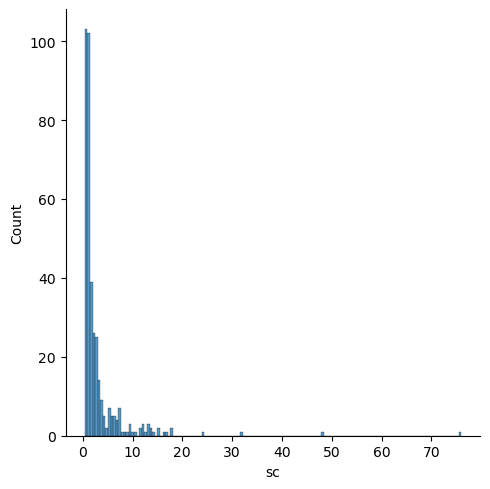

In [33]:
sns.displot(df['sc'])

In [34]:
df_copy=df.copy()
for var_class in df['pc'].unique():
    df_copy.update(df[df.loc[:,'pc'] == var_class]["sc"].replace(np.nan,df[df.loc[:,'pc'] == var_class]["pc"].mean()))
df['sc']=df_copy['sc']

# Successfully Cleaned Data

In [35]:
df.isnull().sum()

id                 0
age                0
bp                 0
sg                47
al                46
su                49
rbc                0
pc                 0
pcc                0
ba                 0
bgr                0
bu                 0
sc                 0
sod                0
pot               88
hemo               0
pcv               71
wc                 0
rc                 0
htn                0
dm                 1
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64

In [36]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [37]:
X = df.iloc[:,:-1]
y = df['classification']

In [38]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)

In [39]:
from sklearn.ensemble import  BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [40]:

crossvalidation_score=[]
mod = []
model =[BaggingClassifier(), SVC(),RandomForestClassifier(), GradientBoostingClassifier(),
        DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier(),LogisticRegression(),GaussianNB(),LinearRegression(),]
for mdl in model:
    crossvalidation_score.append(cross_val_score(mdl, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(mdl)
model_df= pd.DataFrame(columns=['model','crossvalidation_score'])
model_df['model']= mod
model_df['crossvalidation_score']= crossvalidation_score
model_df.sort_values(by=['crossvalidation_score'], ascending=True)


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Divyanshu Dubey\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Divyanshu Dubey\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Divyanshu Dubey\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Divyanshu Dubey\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Divyanshu Dubey\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Divyanshu Dubey\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 959, in check_array
    _assert_all_finite(
  File "C:\Users\Divyanshu Dubey\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 124, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\Users\Divyanshu Dubey\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 173, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
lmodel = LogisticRegression()
lmodel.fit(X_train,y_train)
pred = lmodel.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(lmodel.score)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
dmodel = DecisionTreeClassifier()
dmodel.fit(X_train,y_train)
pred = dmodel.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(dmodel.score)

In [ ]:

gmodel = GradientBoostingClassifier()
gmodel.fit(X_train,y_train)
pred = gmodel.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(gmodel.score)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
rmodel = RandomForestClassifier()
rmodel.fit(X_train,y_train)
pred = rmodel.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(rmodel.score)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print(model.score)


In [ ]:
linear=LinearRegression()
linear.fit(X_train,y_train)

In [ ]:
y_pred=linear.predict(X_test)
y_pred

In [ ]:
r2_score(y_test,y_pred)